<a href="https://colab.research.google.com/github/HimanshuSahoo/Assignments_Codes/blob/main/Books_Recommendation_EDA_PArt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
books_data = pd.read_csv("D:/P79 G2/P79-G2-Private-Repo-main/P79-G2-Private-Repo-main/books_data_40.csv")
books_data.head()

,Unnamed: 0,title,author,average_rating,genre,description
0,0,To Kill a Mockingbird,Harper Lee,4.27,Classics,The unforgettable novel of a childhood in a sl...
1,1,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...
2,2,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...
3,3,Animal Farm,George Orwell,3.97,Classics,Librarian's note: There is an Alternate Cover ...
4,4,The Little Prince,Antoine de Saint-Exupéry,4.31,Classics,A pilot stranded in the desert awakes one morn...


In [ ]:
books_data.shape

(3352, 6)

In [ ]:
books_data = books_data.drop(['Unnamed: 0'],axis=True)
books_data.head()

,title,author,average_rating,genre,description
0,To Kill a Mockingbird,Harper Lee,4.27,Classics,The unforgettable novel of a childhood in a sl...
1,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...
2,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...
3,Animal Farm,George Orwell,3.97,Classics,Librarian's note: There is an Alternate Cover ...
4,The Little Prince,Antoine de Saint-Exupéry,4.31,Classics,A pilot stranded in the desert awakes one morn...


#### Data Exploration

In [ ]:
books_data.isnull().sum()

title             0
author            0
average_rating    0
genre             0
description       0
dtype: int64

In [ ]:
books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3352 entries, 0 to 3351
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3352 non-null   object 
 1   author          3352 non-null   object 
 2   average_rating  3352 non-null   float64
 3   genre           3352 non-null   object 
 4   description     3352 non-null   object 
dtypes: float64(1), object(4)
memory usage: 131.1+ KB


In [ ]:
books_data.describe()

,average_rating
count,3352.000000
mean,4.035200
std,0.261937
min,2.050000
25%,3.877500
50%,4.050000
75%,4.220000
max,4.970000


In [ ]:
books_data.duplicated().sum()

16

In [ ]:
df = books_data.drop_duplicates()
df.shape

(3336, 5)

In [ ]:
df['genre'].value_counts()

Fiction        802
Nonfiction     391
Fantasy        324
Classics       302
Young Adult    182
              ... 
Design           1
Literature       1
Modern           1
Apocalyptic      1
Marriage         1
Name: genre, Length: 77, dtype: int64

<AxesSubplot:>

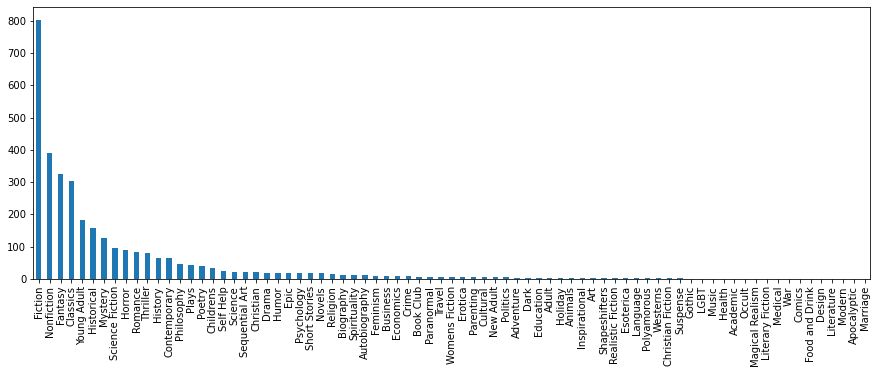

In [ ]:
df['genre'].value_counts().plot(x='genre', y='count', kind='bar', figsize=(15,5))

In [ ]:
# Printing the book title and description randomly
print(df['title'][50])
print(df['description'][50])

The Adventures of Tom Sawyer
The Adventures of Tom Sawyer revolves around the youthful adventures of the novel's schoolboy protagonist, Thomas Sawyer, whose reputation precedes him for causing mischief and strife. Tom lives with his Aunt Polly, half-brother Sid, and cousin Mary in the quaint town of St. Petersburg, just off the shore of the Mississippi River. St. Petersburg is described as a typical s
The Adventures of Tom Sawyer revolves around the youthful adventures of the novel's schoolboy protagonist, Thomas Sawyer, whose reputation precedes him for causing mischief and strife. Tom lives with his Aunt Polly, half-brother Sid, and cousin Mary in the quaint town of St. Petersburg, just off the shore of the Mississippi River. St. Petersburg is described as a typical small-town atmosphere where the Christian faith is predominant, the social network is close-knit, and familiarity resides.  Unlike his brother Sid, Tom receives "lickings" from his Aunt Polly; ever the mischief-maker, wou

In [ ]:
# Printing the book title and description randomly
print(df['title'][1200])
print(df['description'][1200])

Gödel, Escher, Bach: An Eternal Golden Braid
Douglas Hofstadter's book is concerned directly with the nature of “maps” or links between formal systems. However, according to Hofstadter, the formal system that underlies all mental activity transcends the system that supports it. If life can grow out of the formal chemical substrate of the cell, if consciousness can emerge out of a formal system of firing neurons, then
Douglas Hofstadter's book is concerned directly with the nature of “maps” or links between formal systems. However, according to Hofstadter, the formal system that underlies all mental activity transcends the system that supports it. If life can grow out of the formal chemical substrate of the cell, if consciousness can emerge out of a formal system of firing neurons, then so too will computers attain human intelligence. Gödel, Escher, Bach is a wonderful exploration of fascinating ideas at the heart of cognitive science: meaning, reduction, recursion, and much more.
...mo

### Book description — Word count distribution

<ipython-input-14-6b34ae67b02e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['description'].apply(lambda x: len(str(x).split()))


<AxesSubplot:title={'center':'Word Count Distribution for book descriptions'}, ylabel='Frequency'>

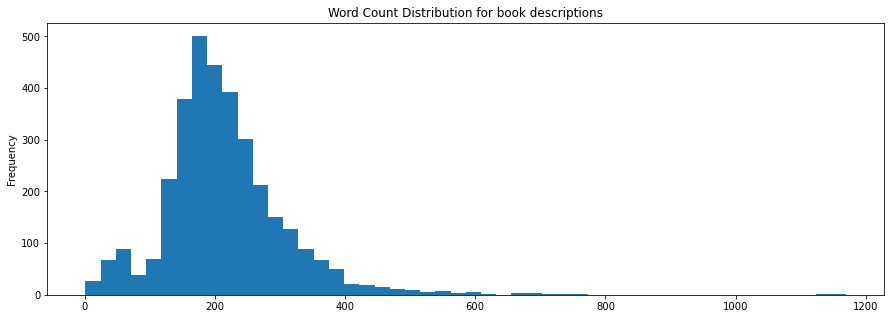

In [ ]:
# Calculating the word count for book description
df['word_count'] = df['description'].apply(lambda x: len(str(x).split()))
# Plotting the word_count
df['word_count'].plot(
    kind = 'hist',
    bins = 50,
    figsize = (15,5), title = 'Word Count Distribution for book descriptions')

We don’t have many lengthy book description. It is clear that goodreads.com provides short descriptions.

### The distribution of top part-of-speech tags in the book descriptions

In [ ]:
from textblob import TextBlob
blob = TextBlob(str(df['description']))
pos_df = pd.DataFrame(blob.tags, columns=['word','pos'])
pos_df

,word,pos
0,0,CD
1,The,DT
2,unforgettable,JJ
3,novel,NN
4,of,IN
...,...,...
95,description,NN
96,Length,NNP
97,3336,CD
98,dtype,NN


<AxesSubplot:title={'center':'Top 20 Part-of-Speech tagging for the book descriptions'}>

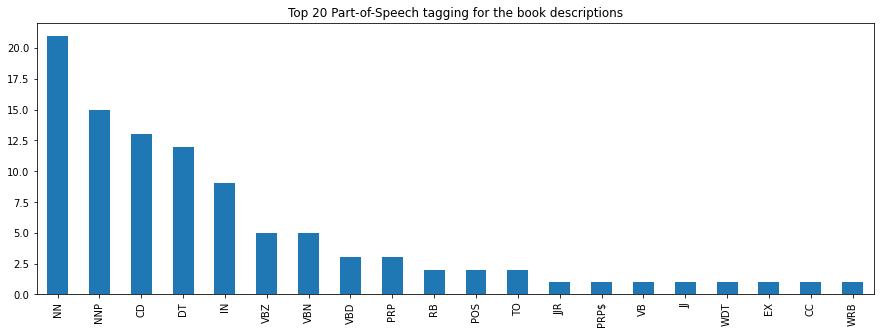

In [ ]:
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind='bar', figsize=(15,5), title="Top 20 Part-of-Speech tagging for the book descriptions" )

### Bigram distribution for the book description

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

#Converting text descriptions into vectors using TF-IDF using Bigram
tfidf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tfidf.fit_transform(df['description'])
total_words = tfidf_matrix.sum(axis=0)

#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)

#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True)

#Taking first 20 records
bigram = bigram.head(20)
bigram

,bigram,count
0,year old,15.300285
1,New York,14.651494
2,York Times,8.745844
3,cover edition,7.516392
4,bestselling author,6.471661
5,World War,5.939310
6,best friend,5.914390
7,years ago,5.738231
8,young woman,5.396650
9,tells story,5.293565


<AxesSubplot:title={'center':'Bigram disribution for the top 20 words in the book description'}, xlabel='bigram'>

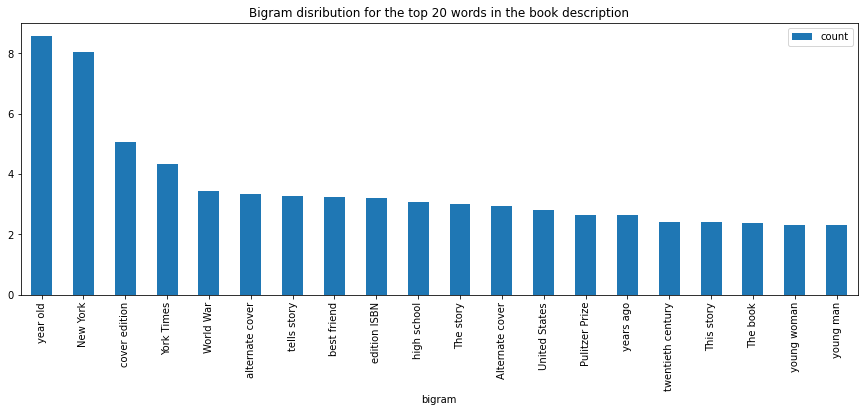

In [ ]:
#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the book description", figsize = (15,5))

### Trigram distribution for the book description

In [ ]:
#Converting text descriptions into vectors using TF-IDF using Trigram
tfidf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tfidf.fit_transform(df['description'])
total_words = tfidf_matrix.sum(axis=0)

#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)

#converting into dataframe 
trigram = pd.DataFrame(freq)
trigram.rename(columns = {0:'trigram', 1: 'count'}, inplace = True)

#Taking first 20 records
trigram = trigram.head(20)
trigram

,trigram,count
0,New York Times,8.622413
1,York Times bestselling,4.504851
2,alternate cover edition,4.326905
3,World War II,3.759510
4,cover edition ISBN,3.742136
5,New York City,3.546020
6,Times bestselling author,3.415846
7,Alternate cover edition,3.293770
8,An alternate cover,2.924077
9,Pulitzer Prize winning,2.438539


<AxesSubplot:title={'center':'Trigram disribution for the top 20 words in the book description'}, xlabel='trigram'>

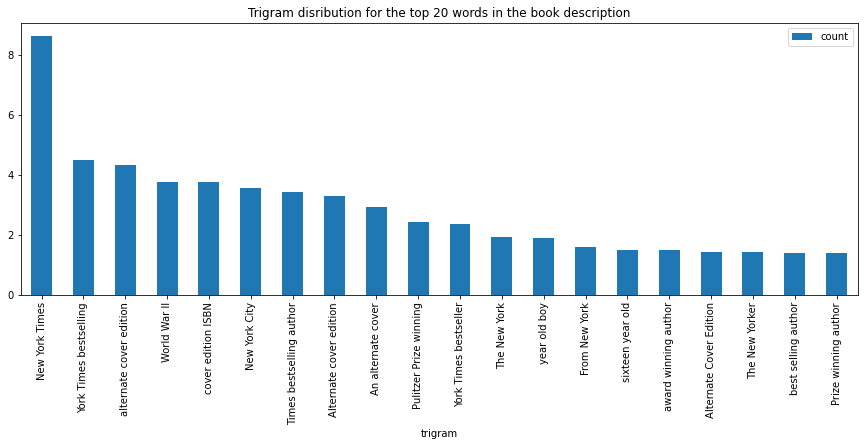

In [ ]:
#Plotting the trigram distribution
trigram.plot(x ='trigram', y='count', kind = 'bar', title = "Trigram disribution for the top 20 words in the book description", figsize = (15,5))